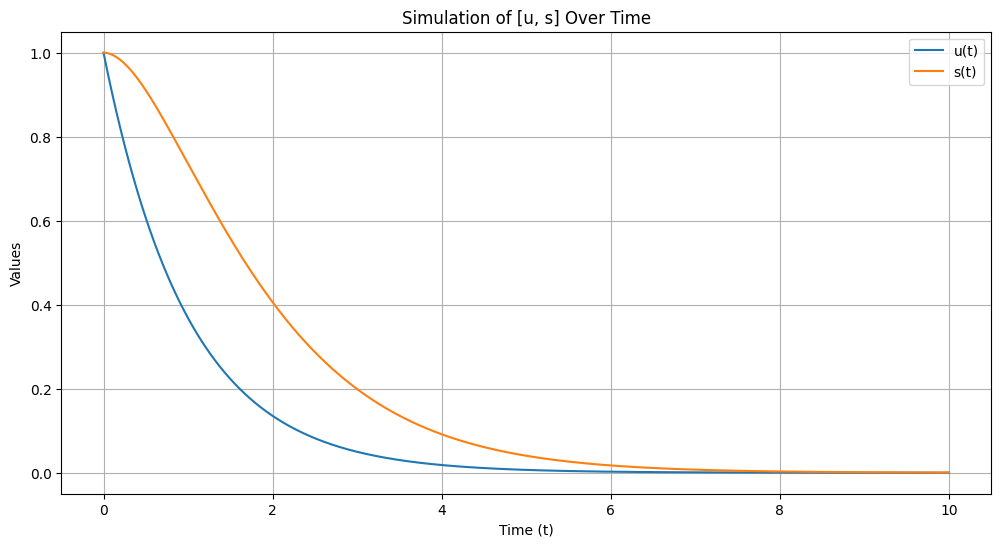

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sckinetics import high_resolution_raw
# Constants
alpha = 0
beta = 1
gamma = 1
u0 = 1
s0 = 1
n_points = 1000

# Time span for the simulation
t_span = (0, 10)  # Adjust as needed

# Define the system of ODEs
def system_of_odes(t, y):
    u, s = y
    du_dt = alpha - beta * u
    ds_dt = beta * u - gamma * s
    return [du_dt, ds_dt]

# Initial conditions
initial_conditions = [u0, s0]

# Solve the system of ODEs
solution = solve_ivp(system_of_odes, t_span, initial_conditions, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], n_points))

# Extracting time and [u, s] values
t_values = solution.t
u_s_values = solution.y
u = u_s_values[0]
s = u_s_values[1]
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_values, u, label='u(t)')
plt.plot(t_values, s, label='s(t)')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Simulation of [u, s] Over Time')
plt.legend()
plt.grid(True)
plt.show()

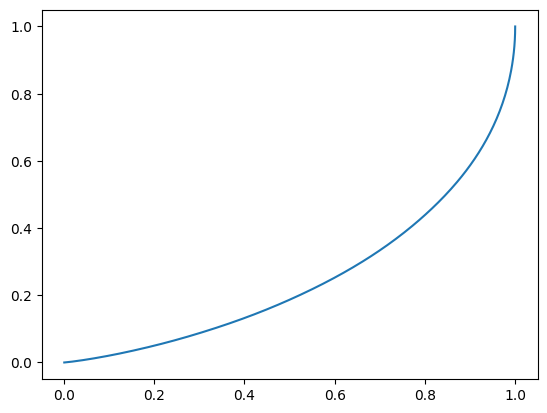

In [2]:
plt.plot(s, u, label='s(t)')
plt.show()

In [4]:
# Initialize and fit the NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=50)
knn_model.fit(u_s_values.T)
# Compute the k-nearest neighbors graph
knn_graph = knn_model.kneighbors_graph(u_s_values.T)
knn_graph_dense = knn_graph.toarray()

Do the high-resolution mode test, the optimization result for each alpha beta gamma should be similar to the pre-set parameters

In [5]:
alpha, beta, gamma = high_resolution_raw(u=u.reshape(-1,1),
                                         s=s.reshape(-1,1),
                                         t=t_values,
                                         adj=knn_graph_dense,optimizer='jax')

  2%|▏         | 16/1000 [00:19<00:09, 98.67it/s]An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enable

In [7]:
print(alpha.min(), alpha.max(), alpha.mean())

0.0 0.05293187126517296 0.010660908192846107


In [8]:
print(beta.min(), beta.max(), beta.mean())

0.9934563040733337 2.1810643672943115 1.726300980091095


In [9]:
print(gamma.min(), gamma.max(), gamma.mean())

0.9926091432571411 1.1968138217926025 1.1201849277615548


In [10]:
alpha, beta, gamma = high_resolution_raw(u=u.reshape(-1,1),
                                         s=s.reshape(-1,1),
                                         t=t_values,
                                         adj=knn_graph_dense,optimizer='scipy')

100%|██████████| 1000/1000 [00:02<00:00, 388.49it/s]


In [11]:
print(alpha.min(), alpha.max(), alpha.mean())
print(beta.min(), beta.max(), beta.mean())
print(gamma.min(), gamma.max(), gamma.mean())

0.0 0.09856403650888418 0.007588357318333412
0.992596873220123 1.9445461310083725 1.5646673753071472
0.9918837823274925 1.2525873043379028 1.0640737642024414


In [3]:
for n_neighbors in [5, 10, 15, 20, 25, 30, 40, 50, 60, 80, 100]:
    print("n_neighbors is", n_neighbors)
    # Initialize and fit the NearestNeighbors model
    knn_model = NearestNeighbors(n_neighbors=n_neighbors)
    knn_model.fit(u_s_values.T)
    # Compute the k-nearest neighbors graph
    knn_graph = knn_model.kneighbors_graph(u_s_values.T)
    knn_graph_dense = knn_graph.toarray()
    alpha, beta, gamma = high_resolution_raw(u=u.reshape(-1,1),
                                         s=s.reshape(-1,1),
                                         t=t_values,
                                         adj=knn_graph_dense,optimizer='scipy')
    print(alpha.min(), alpha.max(), alpha.mean())
    print(beta.min(), beta.max(), beta.mean())
    print(gamma.min(), gamma.max(), gamma.mean())

n_neighbors is 5


100%|██████████| 1000/1000 [00:59<00:00, 16.82it/s]


0.00020357822254052772 0.3342871729759011 0.02679338978512886
1.0001025556610295 1.34996782751193 1.064246852412418
1.0000075071559982 1.3308150118117545 1.0325817893410667
n_neighbors is 10


100%|██████████| 1000/1000 [00:00<00:00, 1727.97it/s]


0.0 0.33095426924096844 0.02669854800654999
1.0018890407535823 1.3545454679593125 1.0655452520531556
1.0000226876978406 1.3293403037207594 1.0341571360555655
n_neighbors is 15


100%|██████████| 1000/1000 [00:00<00:00, 1619.67it/s]


0.0 0.3306249645846697 0.026632309105846342
0.9951662396613621 1.3567753139324505 1.0717850358146552
0.9952796135133172 1.328864475170632 1.0348743398540023
n_neighbors is 20


100%|██████████| 1000/1000 [00:00<00:00, 1350.23it/s]


0.0 0.32730490763828124 0.01576549994677951
0.9924519048866614 1.3649396741738091 1.0730959791782406
0.9906223793939767 1.330705560698639 1.0250101351309036
n_neighbors is 25


100%|██████████| 1000/1000 [00:01<00:00, 971.55it/s]


0.0 0.14877197707473952 0.010615647232408631
0.991785481958213 1.340439638906999 1.0944490649869043
0.991488655054595 1.1945845122525647 1.0220380749026774
n_neighbors is 30


100%|██████████| 1000/1000 [00:01<00:00, 616.84it/s]


0.0 0.12208612599744584 0.009638879931937195
0.9928396207990878 1.4006380667632607 1.1449360896684433
0.9909706847027381 1.195361231957348 1.0266257394614913
n_neighbors is 40


100%|██████████| 1000/1000 [00:02<00:00, 497.16it/s]


0.0 0.07919320225262334 0.007009567660844534
0.9915638557997621 1.5839426290315648 1.303463247839436
0.9928642834210705 1.1742567778830153 1.0373265867986428
n_neighbors is 50


100%|██████████| 1000/1000 [00:02<00:00, 399.79it/s]


0.0 0.0836696563400348 0.0073198599180355544
0.9916818514325522 1.9415801180619752 1.5624776936047717
0.9934809198906132 1.2552441486289698 1.063459889875171
n_neighbors is 60


100%|██████████| 1000/1000 [00:03<00:00, 325.50it/s]


0.0 0.1664633926026642 0.005168729531700449
0.9927662818929484 2.3068672553603564 1.8030647619074016
0.9930013930194124 1.2961679866542144 1.088094256500197
n_neighbors is 80


100%|██████████| 1000/1000 [00:03<00:00, 308.76it/s]


0.0 0.04246066485676967 0.0032438216441191825
0.9926122888015486 2.254901183860171 1.7065738507609174
0.9925570177103595 1.256414078996574 1.101451594742313
n_neighbors is 100


100%|██████████| 1000/1000 [00:03<00:00, 259.24it/s]


0.0 0.08896402031693529 0.0015221267124744357
0.992657987157087 1.6790811495737599 1.2408951758648672
0.9888769197440347 1.168696246523455 1.0520889794639812


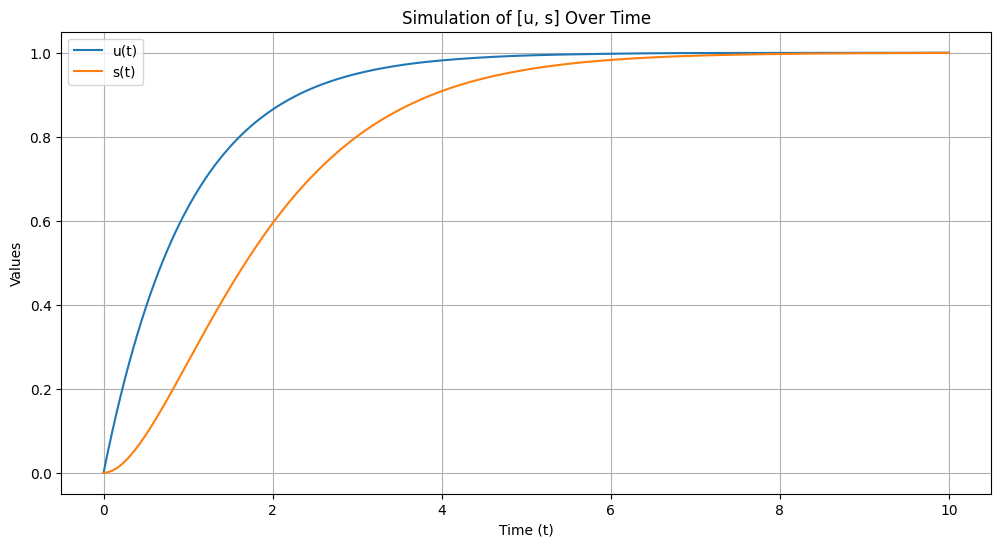

In [12]:
# Constants
alpha = 1
beta = 1
gamma = 1
u0 = 0
s0 = 0
n_points = 1000

# Time span for the simulation
t_span = (0, 10)  # Adjust as needed

# Define the system of ODEs
def system_of_odes(t, y):
    u, s = y
    du_dt = alpha - beta * u
    ds_dt = beta * u - gamma * s
    return [du_dt, ds_dt]

# Initial conditions
initial_conditions = [u0, s0]

# Solve the system of ODEs
solution = solve_ivp(system_of_odes, t_span, initial_conditions, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], n_points))

# Extracting time and [u, s] values
t_values = solution.t
u_s_values = solution.y
u = u_s_values[0]
s = u_s_values[1]
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_values, u, label='u(t)')
plt.plot(t_values, s, label='s(t)')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Simulation of [u, s] Over Time')
plt.legend()
plt.grid(True)
plt.show()

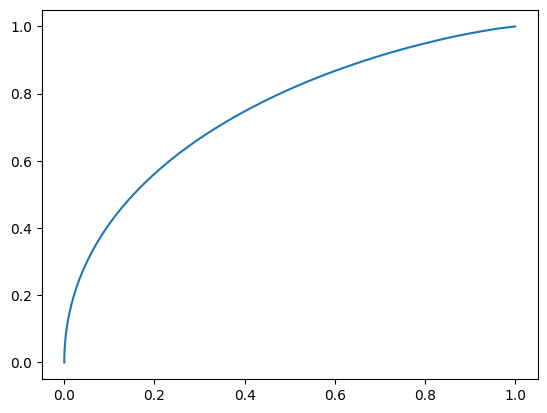

In [13]:
plt.plot(s, u, label='s(t)')
plt.show()

In [14]:
from sklearn.neighbors import NearestNeighbors
# Initialize and fit the NearestNeighbors model
knn_model = NearestNeighbors(n_neighbors=50)
knn_model.fit(u_s_values.T)
# Compute the k-nearest neighbors graph
knn_graph = knn_model.kneighbors_graph(u_s_values.T)
knn_graph_dense = knn_graph.toarray()

In [15]:
alpha, beta, gamma = high_resolution_raw(u=u.reshape(-1,1),
                                         s=s.reshape(-1,1),
                                         t=t_values,
                                         adj=knn_graph_dense,optimizer='jax')

 59%|█████▉    | 592/1000 [04:15<02:58,  2.28it/s]An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
 61%|██████    | 608/1000 [04:37<04:41,  1.39it/s]An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
 64%|██████▍   | 640/1000 [05:05<04:26,  1.35it/s]An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib i

In [16]:
print(alpha.min(), alpha.max(), alpha.mean())
print(beta.min(), beta.max(), beta.mean())
print(gamma.min(), gamma.max(), gamma.mean())

0.9487035274505615 1.1001688241958618 1.0016735612154006
0.9404059052467346 1.1220839023590088 1.0022940437793733
0.7279749512672424 1.5245262384414673 1.0044109114408493


In [17]:
alpha, beta, gamma = high_resolution_raw(u=u.reshape(-1,1),
                                         s=s.reshape(-1,1),
                                         t=t_values,
                                         adj=knn_graph_dense,optimizer='scipy')

100%|██████████| 1000/1000 [00:01<00:00, 738.81it/s]


In [18]:
print(alpha.min(), alpha.max(), alpha.mean())
print(beta.min(), beta.max(), beta.mean())
print(gamma.min(), gamma.max(), gamma.mean())

0.9079493005000243 1.140897672395319 1.0000925144115858
0.901444446165436 1.1669162015471741 1.0000994264985241
0.6512459118584939 1.5223275371424914 0.9993626494518629


In [19]:
for n_neighbors in [5, 10, 15, 20, 25, 30, 40, 50, 60, 80, 100]:
    print("n_neighbors is", n_neighbors)
    # Initialize and fit the NearestNeighbors model
    knn_model = NearestNeighbors(n_neighbors=n_neighbors)
    knn_model.fit(u_s_values.T)
    # Compute the k-nearest neighbors graph
    knn_graph = knn_model.kneighbors_graph(u_s_values.T)
    knn_graph_dense = knn_graph.toarray()
    alpha, beta, gamma = high_resolution_raw(u=u.reshape(-1,1),
                                         s=s.reshape(-1,1),
                                         t=t_values,
                                         adj=knn_graph_dense,optimizer='scipy')
    print(alpha.min(), alpha.max(), alpha.mean())
    print(beta.min(), beta.max(), beta.mean())
    print(gamma.min(), gamma.max(), gamma.mean())

n_neighbors is 5


100%|██████████| 1000/1000 [00:00<00:00, 5855.19it/s]


0.9999574888207113 1.012540015754958 1.0000291482192347
0.9991825322352604 1.001169786308361 1.0000003992246942
0.9987900395021918 1.0000099363187198 0.9999978649960184
n_neighbors is 10


100%|██████████| 1000/1000 [00:00<00:00, 3146.57it/s]


0.9931794159362284 1.0194037626981136 1.0000407474908426
0.994337643801237 1.0173364337838873 1.0000559666773186
0.9952493699595348 1.0024922213262175 0.9999817552988689
n_neighbors is 15


100%|██████████| 1000/1000 [00:00<00:00, 2371.92it/s]


0.993545083682022 1.0123799454627267 1.0001188148137765
0.993363908602531 1.0134325236469017 1.0001194649437164
0.9951249351169794 1.0023859909669348 0.999922608323445
n_neighbors is 20


100%|██████████| 1000/1000 [00:00<00:00, 2279.00it/s]


0.9937041777324299 1.0096952633741847 0.9999566503135335
0.9840890028206447 1.0091557555371833 0.9999624159054256
0.9963304022849309 1.0022641763360056 1.0000220567734026
n_neighbors is 25


100%|██████████| 1000/1000 [00:00<00:00, 1833.06it/s]


0.929408184471204 1.0167382755888184 0.9998560263295426
0.8752353652945156 1.0138190935172025 0.9997483051577929
0.6492524694180768 1.0024388784648244 0.9993750398304396
n_neighbors is 30


100%|██████████| 1000/1000 [00:00<00:00, 1522.38it/s]


0.911116194712882 1.1471448944813463 1.0003277527446621
0.8734607094956778 1.191180907015926 1.000815365461119
0.6774072565398112 2.713511894187526 1.004646742837887
n_neighbors is 40


100%|██████████| 1000/1000 [00:01<00:00, 918.15it/s]


0.882712422690177 1.2847954525540644 1.000804924506169
0.8726473408069582 1.3012107083876712 1.0008469492870042
0.4211728639082531 1.7830187675483755 1.0002838468480328
n_neighbors is 50


100%|██████████| 1000/1000 [00:01<00:00, 864.32it/s]


0.9123216787434552 1.224328951003805 1.0003155803435848
0.9066782510871554 1.2366726195622444 1.0003657146378373
0.6067416466162727 1.643770945262846 0.9999511474358262
n_neighbors is 60


100%|██████████| 1000/1000 [00:01<00:00, 705.92it/s]


0.9278169205980462 1.1410995379345554 1.0003847141308304
0.9206902041483191 1.14738536906215 1.0005187702350231
0.7633906419358448 1.3418980427752882 1.000826194691225
n_neighbors is 80


100%|██████████| 1000/1000 [00:01<00:00, 665.22it/s]


0.9201440296364851 1.1347029943609752 0.999917021459595
0.9186662607809053 1.1364596312686777 0.9998059894046942
0.7989159233038013 1.2212602064645828 0.9992426233969547
n_neighbors is 100


100%|██████████| 1000/1000 [00:01<00:00, 589.88it/s]


0.9381184852817039 1.0998338620285562 1.0000965814691662
0.9375200455674074 1.1008302001123924 0.9999347610874358
0.8648690939577195 1.1767029776256601 0.9991166020840806
